In [1]:
import os
import json
import math
import ast
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt 

## Rename files

In [12]:
rename_files(Path("/home/ravil/EVA/Session_16/raw"))

## Resize images to 400 x 400

In [9]:
from PIL import Image

def resize_img(folder,size):
    
    files = os.listdir(folder)
    if not os.path.exists(folder/"resized"):
        os.mkdir(folder/"resized")
    for file in files:
        #print(file)
        try:
            
            img = Image.open(folder/file)
            fname = file.split(".")[0]
    #         print(fname)

            width, height = img.size[:2]

            if height > width:
                baseheight = size
                hpercent = (baseheight/float(img.size[1]))
                wsize = int((float(img.size[0])*float(hpercent)))
                img = img.resize((wsize, baseheight), Image.ANTIALIAS)
                img.save(folder/"resized"/f'{fname}.jpg')
            else:
                basewidth = size
                wpercent = (basewidth/float(img.size[0]))
                hsize = int((float(img.size[1])*float(wpercent)))
                img = img.resize((basewidth,hsize), Image.ANTIALIAS)
                img.save(folder/"resized"/f'{fname}.jpg')
        except Exception as e       :
            pass

In [29]:
li=os.listdir("/home/kamran/Documents/EVA_SchoolOfAi/Project16/downloads/")

In [30]:
for i in li:
    resize_img(Path(f"/home/kamran/Documents/EVA_SchoolOfAi/Project16/downloads/{i}/"),400)

/home/kamran/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2685: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)



## Reading a json file

In [2]:
with open("via_export_json.json") as f:
    annotations=json.load(f)

In [3]:
annotations

{'250.jpg11096': {'filename': '250.jpg',
  'size': 11096,
  'regions': [{'shape_attributes': {'name': 'rect',
     'x': 148,
     'y': 14,
     'width': 89,
     'height': 103},
    'region_attributes': {'pose': 'front'}}],
  'file_attributes': {'series': '', 'frame_id': ''}},
 '252.jpg14094': {'filename': '252.jpg',
  'size': 14094,
  'regions': [{'shape_attributes': {'name': 'rect',
     'x': 97,
     'y': 0,
     'width': 124,
     'height': 104},
    'region_attributes': {'pose': 'upright'}}],
  'file_attributes': {'series': '', 'frame_id': ''}},
 '254.jpg32811': {'filename': '254.jpg',
  'size': 32811,
  'regions': [{'shape_attributes': {'name': 'rect',
     'x': 74,
     'y': 7,
     'width': 58,
     'height': 72},
    'region_attributes': {'pose': 'front'}},
   {'shape_attributes': {'name': 'rect',
     'x': 284,
     'y': 24,
     'width': 59,
     'height': 66},
    'region_attributes': {'pose': 'front'}}],
  'file_attributes': {'series': '', 'frame_id': ''}},
 '255.jpg23541'

In [63]:
len(df[df["region_shape_attributes"]!="{}"])

204

In [4]:
count=0
new_annotations={}
for i in annotations:
    if annotations[i]["regions"]:
        count+=1
        new_annotations[i]=annotations[i]

In [9]:
all_dimensions=[new_annotations[img]["regions"][i]["shape_attributes"] for img in new_annotations for i in range(len(new_annotations[img]["regions"]))]

In [14]:
df = pd.DataFrame(all_dimensions)

In [16]:
df = df[["width","height"]]

In [17]:
df.head()

,width,height
0,89,103
1,124,104
2,58,72
3,59,66
4,55,51


## Normalise height and width based on image size

In [18]:
df.height = df.height.apply(lambda x: x/400)
df.width = df.width.apply(lambda x: x/400)
df.head()

/home/kamran/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,width,height
0,0.2225,0.2575
1,0.3100,0.2600
2,0.1450,0.1800
3,0.1475,0.1650
4,0.1375,0.1275


In [21]:
df["log(h)"]=df.height.apply(lambda x: math.log(x))
df["log(w)"]=df.width.apply(lambda x: math.log(x))

/home/kamran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/kamran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
df.head()

,width,height,log(h),log(w)
0,0.2225,0.2575,-1.356736,-1.502828
1,0.3100,0.2600,-1.347074,-1.171183
2,0.1450,0.1800,-1.714798,-1.931022
3,0.1475,0.1650,-1.801810,-1.913927
4,0.1375,0.1275,-2.059639,-1.984131


## Plot graphs for h vs w

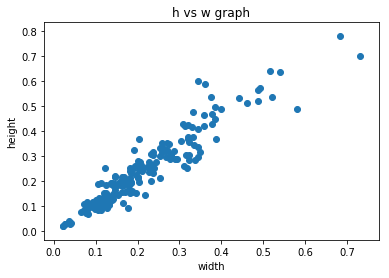

In [24]:

# plotting the points  
plt.scatter(df.width, df.height) 

# naming the x axis 
plt.xlabel('width') 
# naming the y axis 
plt.ylabel('height') 
  
# giving a title to my graph 
plt.title('h vs w graph') 
  
# function to show the plot 
plt.show()

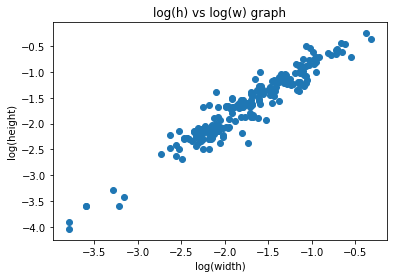

In [25]:

# plotting the points  
plt.scatter(df["log(w)"], df["log(h)"]) 

# naming the x axis 
plt.xlabel('log(width)') 
# naming the y axis 
plt.ylabel('log(height)') 
  
# giving a title to my graph 
plt.title('log(h) vs log(w) graph') 
  
# function to show the plot 
plt.show()

## Calculate k-means clustering

In [26]:
data = np.array([df["width"].tolist(),df["height"].tolist()]).T

In [27]:
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[["width","height"]])
centroids = kmeans.cluster_centers_
print("Mean IOU = {:.2f}%".format(avg_iou(data, centroids) * 100))
print("Boxes:\n {}".format(centroids))
boxes = centroids

Mean IOU = 73.59%
Boxes:
 [[0.17943182 0.20757576]
 [0.48117647 0.56882353]
 [0.29913265 0.34326531]
 [0.10344595 0.10351351]]


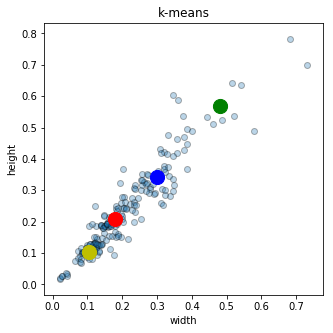

In [32]:
fig = plt.figure(figsize=(5, 5))

colmap = {1: 'r', 2: 'g', 3: 'b', 4:'y'}
plt.scatter(df['width'], df['height'], alpha=0.3, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1],s=200)
    
# naming the x axis 
plt.xlabel('width') 
# naming the y axis 
plt.ylabel('height') 
  
# giving a title to my graph 
plt.title('k-means') 
plt.show()

## Plot Centroid vs Mean IOU graph

In [33]:
def iou(box, clusters):
    x = np.minimum(clusters[:, 0], box[0])
    y = np.minimum(clusters[:, 1], box[1])
    if np.count_nonzero(x == 0) > 0 or np.count_nonzero(y == 0) > 0:
        raise ValueError("Box has no area")

    intersection = x * y
    box_area = box[0] * box[1]
    cluster_area = clusters[:, 0] * clusters[:, 1]

    iou_ = intersection / (box_area + cluster_area - intersection)

    return iou_


def avg_iou(boxes, clusters):
    return np.mean([np.max(iou(boxes[i], clusters)) for i in range(boxes.shape[0])])


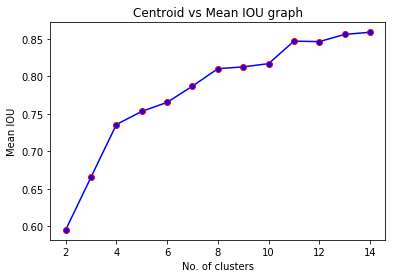

In [34]:
k=[]
mean_iou=[]
for i in range(2,15):
    K = KMeans(i, random_state=1)
    K.fit(data)
    centroids = K.cluster_centers_
    k.append(i)
    mean_iou.append(avg_iou(data,centroids))


# plotting the points  
plt.plot(k, mean_iou,'-o',c='b',markeredgecolor='r') 

# naming the x axis 
plt.xlabel('No. of clusters') 
# naming the y axis 
plt.ylabel('Mean IOU') 
  
# giving a title to my graph 
plt.title('Centroid vs Mean IOU graph') 
  
# function to show the plot 
plt.show()

## As we can see, the elbow is pointed at k=4 

In [36]:
boxes

array([[0.17943182, 0.20757576],
       [0.48117647, 0.56882353],
       [0.29913265, 0.34326531],
       [0.10344595, 0.10351351]])

In [37]:
plt.Rectangle((0., 0.), 0.4, 0.15, color='k', fill=True)
plt.show()

## Rename files

In [43]:
import re
img_names=[re.findall(r".*.jpg",img_name)[0] for img_name in  list(new_annotations.keys())]

In [45]:
corrected_name_annotations={}
for img_name,old_img_name in zip(img_names,new_annotations):
    corrected_name_annotations[img_name]=new_annotations[old_img_name]

In [50]:
corrected_name_annotations_renamed_to_img={}
for idx,img_name in enumerate(corrected_name_annotations):
    corrected_name_annotations_renamed_to_img["img_"+str(idx)+".jpg"]=corrected_name_annotations[img_name]
    corrected_name_annotations_renamed_to_img["img_"+str(idx)+".jpg"]["filename"]="img_"+str(idx)+".jpg"

In [52]:
new_filenames_map={i:j for i,j in zip(corrected_name_annotations,corrected_name_annotations_renamed_to_img)}

In [53]:
new_filenames_map

{'250.jpg': 'img_0.jpg',
 '252.jpg': 'img_1.jpg',
 '254.jpg': 'img_2.jpg',
 '255.jpg': 'img_3.jpg',
 '259.jpg': 'img_4.jpg',
 '261.jpg': 'img_5.jpg',
 '262.jpg': 'img_6.jpg',
 '264.jpg': 'img_7.jpg',
 '265.jpg': 'img_8.jpg',
 '267.jpg': 'img_9.jpg',
 '268.jpg': 'img_10.jpg',
 '269.jpg': 'img_11.jpg',
 '271.jpg': 'img_12.jpg',
 '272.jpg': 'img_13.jpg',
 '273.jpg': 'img_14.jpg',
 '274.jpg': 'img_15.jpg',
 '275.jpg': 'img_16.jpg',
 '276.jpg': 'img_17.jpg',
 '277.jpg': 'img_18.jpg',
 '279.jpg': 'img_19.jpg',
 '282.jpg': 'img_20.jpg',
 '283.jpg': 'img_21.jpg',
 '284.jpg': 'img_22.jpg',
 '285.jpg': 'img_23.jpg',
 '286.jpg': 'img_24.jpg',
 '288.jpg': 'img_25.jpg',
 '289.jpg': 'img_26.jpg',
 '290.jpg': 'img_27.jpg',
 '291.jpg': 'img_28.jpg',
 '292.jpg': 'img_29.jpg',
 '293.jpg': 'img_30.jpg',
 '294.jpg': 'img_31.jpg',
 '295.jpg': 'img_32.jpg',
 '298.jpg': 'img_33.jpg',
 '299.jpg': 'img_34.jpg',
 '300.jpg': 'img_35.jpg',
 '301.jpg': 'img_36.jpg',
 '302.jpg': 'img_37.jpg',
 '303.jpg': 'img_38.jp

In [57]:
from glob import glob
import shutil

In [62]:
corrected_name_annotations_renamed_to_img["img_54.jpg"]

{'filename': 'img_54.jpg',
 'size': 19027,
 'regions': [{'shape_attributes': {'name': 'rect',
    'x': 13,
    'y': 69,
    'width': 138,
    'height': 241},
   'region_attributes': {'pose': 'left'}},
  {'shape_attributes': {'name': 'rect',
    'x': 224,
    'y': 70,
    'width': 144,
    'height': 235},
   'region_attributes': {'pose': 'left'}}],
 'file_attributes': {'series': '', 'frame_id': ''}}

In [65]:
with  open("final_submission_annotations.json","w") as file:
    json.dump(corrected_name_annotations_renamed_to_img,file)

In [61]:

for img in glob('downloads/All_Images/*'):
    print(img.split('/')[-1])
    try:
        
        shutil.copy(img,"downloads/final_submission/"+new_filenames_map[img.split('/')[-1]])
    except :
        pass

360.jpg
467.jpg
424.jpg
405.jpg
471.jpg
272.jpg
402.jpg
346.jpg
419.jpg
473.jpg
280.jpg
270.jpg
417.jpg
283.jpg
269.jpg
342.jpg
388.jpg
327.jpg
302.jpg
466.jpg
415.jpg
423.jpg
432.jpg
381.jpg
438.jpg
310.jpg
442.jpg
456.jpg
426.jpg
449.jpg
468.jpg
290.jpg
309.jpg
460.jpg
291.jpg
385.jpg
300.jpg
474.jpg
411.jpg
352.jpg
396.jpg
439.jpg
265.jpg
422.jpg
259.jpg
276.jpg
452.jpg
395.jpg
446.jpg
403.jpg
279.jpg
312.jpg
287.jpg
250.jpg
273.jpg
299.jpg
286.jpg
374.jpg
453.jpg
308.jpg
462.jpg
354.jpg
451.jpg
380.jpg
436.jpg
413.jpg
285.jpg
389.jpg
410.jpg
379.jpg
435.jpg
408.jpg
329.jpg
337.jpg
398.jpg
378.jpg
275.jpg
328.jpg
277.jpg
407.jpg
458.jpg
470.jpg
444.jpg
429.jpg
254.jpg
469.jpg
461.jpg
307.jpg
434.jpg
306.jpg
292.jpg
457.jpg
463.jpg
313.jpg
366.jpg
351.jpg
465.jpg
397.jpg
450.jpg
376.jpg
472.jpg
281.jpg
255.jpg
394.jpg
425.jpg
386.jpg
282.jpg
289.jpg
284.jpg
401.jpg
268.jpg
475.jpg
431.jpg
416.jpg
330.jpg
390.jpg
318.jpg
343.jpg
414.jpg
274.jpg
455.jpg
311.jpg
387.jpg
345.jpg
314.jpg
